# Prova módulo 4

e-mail pra envio: afjmdm@hotmail.com

Enviar com o assunto [PROVA - MÓDULO 4], colocar o nome completo no corpo do e-mail, e tamvbém no título do notebook

### Por favor, enviar o notebook rodado :)

_____

In [59]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Operário

O tempo T, em minutos, necessário para um operário processar certa peça é uma v.a. com a seguinte distribuição de probabilidade
```
t	2	3	4	5	6	7  
p(t)	0.1	0.1	0.3	0.2	0.2	0.1     
```
(a) Como você definiria uma distribuição de probabilidade?

(b) A distribuição acima é contínua ou discreta?

(c) Calcule o tempo médio de processamento.
(Dica: lembre-se que a média de uma variável aleatória é seu valor esperado!)

(d) Para cada peça processada, o operário ganha um fixo de 2,00, mas, se ele processa a peça em menos de seis minutos, ganha 0,50 em cada minuto poupado. Por exemplo, se ele processa a peça em quatro minutos, recebe a quantia adicional de 1,00. Calcule o ganho médio desse operário POR PEÇA.
(Dica: construa uma nova variável aleatória a partir da variável aleatória de tempo de produção da peça!)

(a) Como você definiria uma distribuição de probabilidade?   
Uma distribuição de probabilidade é uma função de estatistica com que pode descrever todos os possivéis valores de um certo  range. Ela é baseade numa distribuição(normal/uniform/poisson/t_student..) Esses distribuições podem ser definidos pelo mean (average), standard deviation, skewness e kurtosis


(b) A distribuição acima é contínua ou discreta?
Ela é discreta, são 7 execuções então uma execução é categorico portanto é discreta.

(c) Calcule o tempo médio de processamento.   
A esperança de uma V.A. $X$ é obtida multiplicando-se cada valor de   
$X = x_i$, $i = 1,..,n$, por sua respectiva probabilidade $P[X = x_i]$, e somando os produtos resultantes:   
   
$E(X) = \sum_{i=1}^n x_i P[X = x_i]$

        Column1
count  6.000000
mean   0.766667
std    0.441210
min    0.200000
25%    0.400000
50%    0.850000
75%    1.150000
max    1.200000


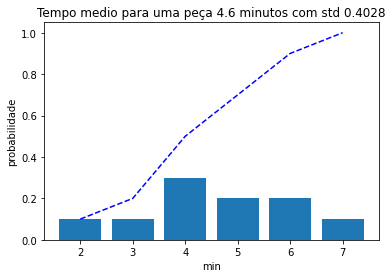

In [60]:
# Valores manuais
tempos = np.array([2,	3,	4,	5,	6,	7])
valores = np.array([0.1,	0.1,	0.3,	0.2,	0.2,	0.1])
adicional = np.array([4,	3.5,	3.0,	2.5,	2,	2])
plt.bar(x=tempos, height=valores)
cum = np.cumsum(valores)                 # CDF e PDF não funcionam para distribuições discretas
print(pd.DataFrame({'Column1':np.multiply(tempos,valores)}).describe())
pmf = cum / np.amax(cum)
plt.plot(tempos,pmf,'b--', label="PMF")
plt.xlabel('min')
plt.ylabel('probabilidade')
plt.title(f"Tempo medio para uma peça {np.round(np.multiply(tempos,valores).sum(),1)} minutos com std {np.round(np.multiply(tempos,valores).std(),4)}")
plt.show()
# print(f"Tempo medio para uma peça {valores.mean()}")

(d) Para cada peça processada, o operário ganha um fixo de 2,00, mas, se ele processa a peça em menos de seis minutos, ganha 0,50 em cada minuto poupado. Por exemplo, se ele processa a peça em quatro minutos, recebe a quantia adicional de 1,00. Calcule o ganho médio desse operário POR PEÇA.

In [61]:
print(f"O ganho médio desse operário POR PEÇA: $R {np.round(np.multiply(adicional,valores).sum(),2)}")

O ganho médio desse operário POR PEÇA: $R 2.75


______

## Controle Qualidade

Um fabricante garante que 90% das peças que fornecem à linha de produção de uma determinada fábrica estão de acordo com as especificações exigidas. A análise de uma amostra de 200 peças revelou 25 defeituosas. A um nível de 5%, podemos dizer que é verdadeira a afirmação do fabricante?

### Definição das hipóteses

$$
    H_0: \mu \geq 90\, \%
$$

$$
    H_1 : \mu < 90 \, \%
$$

In [67]:
n=200
significancia=0.05
confianca = 1 - significancia
media_amostral = 200
desvio_amostral = 25
# erro padrão

SE = desvio_amostral / np.sqrt(n)
# Check das condições do TCL
print(n>=30)

z = (media_amostral - mu)/SE
z
#Calcule o p-value
p_value = norm.sf(z)*2
print(p_value)
p_hat = (200-25)/200
#Tome uma decisão
if p_value > p_hat:
    print("Rejeição da H_0!")
else:
    print("Falha em rejeitar H_0!")




True
0.0
Falha em rejeitar H_0!


______

## Resistência

Na indústria cerâmica, avalia-se sistematicamente a resistência de amostras de massas cerâmicas, após o processo de queima. Dessas avaliações, sabe-se que certo tipo de massa tem resistência mecânica aproximadamente normal, com média 53 MPa e variância populacional de 16 MPa². Após a troca de alguns fornecedores de matérias- primas, deseja-se verificar se houve alteração na qualidade. Uma amostra de 15 corpos de prova de massa cerâmica acusou média igual a 50 MPa. Qual é a conclusão ao nível de significância de 5%?

### Definição das hipóteses

$$
    H_0: \mu \geq 53\, MPa
$$

$$
    H_1 : \mu < 53 \, MPa
$$

In [66]:
mu=53
n=15
media_amostral=50
desvio_amostral = 16
significancia=0.05

p_value = norm.cdf(z)
print(p_value)
if p_value < significancia:
    print("Rejeição da H_0!")
else:
    print("Falha em rejeitar H_0!")

0.23386287393498356
Falha em rejeitar H_0!


______

## Confiança Instrumental

Os multímetros são aparelhos de medição bastante utilizados. Em um lote de amostras para verificação da qualidade, testaram-se 18 válvulas com o multímetro, para determinar sua tensão. O valor médio amostral encontrado para a tensão foi de 3,2 μV.

a) Construa um intervalo de confiança para a tensão média, com nível de confiança de 98%, sabendo que o fabricante das bobinas garante que as tensões são distribuídas segundo uma normal, com variância populacional igual a 3 μV. (Lembre-se que a variância é o quadrado do desvio padrão!)

b) Caso a variância não fosse conhecida, como você procederia para construir o intervalo de confiança?

In [64]:
from scipy.stats import t as t_student
n= 18
variancia = 3
graus_de_liberdade = n - 1
sigma = np.sqrt(variancia)
media_amostral = 3.2
confianca = 0.98
significancia = 1 - confianca
print('Intervalo de confiança da média:', t_student.interval(confianca, loc=media_amostral, scale=sigma/np.sqrt(n), df=graus_de_liberdade))


Intervalo de confiança da média: (2.1520535894127537, 4.247946410587247)


In [85]:
#talvez usando normal e com mean 0 e o significancia 0.02 ?
mu, sigma = 3.2, 0.02 # mean and standard deviation
s = np.random.normal(mu, significancia)
print('Intervalo de confiança da média:', t_student.interval(confianca, loc=s, scale=sigma/np.sqrt(n), df=graus_de_liberdade))

Intervalo de confiança da média: (3.174350463485622, 3.1803179230941776)


______